In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

#### Specifying the problem.
We will consider a 3-qubit quantum phase estimation of a two-qubit state. <br>
Let us take the unitary matrix to be the Controlled - Pauli-Z gate. Then, for state |11⟩ , we get a phase of  θ=0.5 (since Z will flip the phase of the second qubit to -1, thereby getting an eigenvalue of -1).
<br>
We initialize 5 quantum registers, 2 for the state and 3 for the ancilla qubits. <br>
We also initialize 3 classical registers to hold the measurement of the phase.

In [2]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(3, 'c')
qpe = QuantumCircuit(q, c)

# Initialize qubit 3 and 4 to be 1 by applying a Pauli-X gate
qpe.x(q[3])
qpe.x(q[4])
# qpe.x(q[4])
# qpe.x(q[5])

In [3]:
qpe.h(q[0])
qpe.h(q[1])
qpe.h(q[2])
# qpe.h(q[3])

Controlled unitary from q[0] is the identity matrix.<br>
Controlled unitary from q[1] is the identity matrix.<br>
Controlled unitary from q[2] is a Toffoli gate.

In [4]:
qpe.h(q[4])
qpe.ccx(q[2],q[3],q[4])
qpe.h(q[4])

In [5]:
def qft_dagger(circ, q, n):
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circ.h(q[k])

In [6]:
qft_dagger(qpe, q, 3)

qpe.measure(q[0],c[0])
qpe.measure(q[1],c[1])
qpe.measure(q[2],c[2])

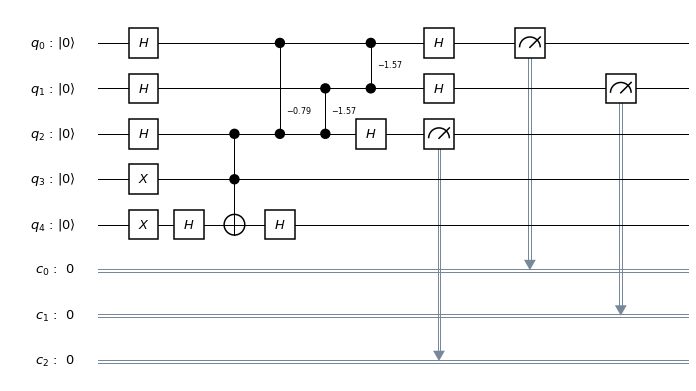

In [7]:
qpe.draw(output="mpl")

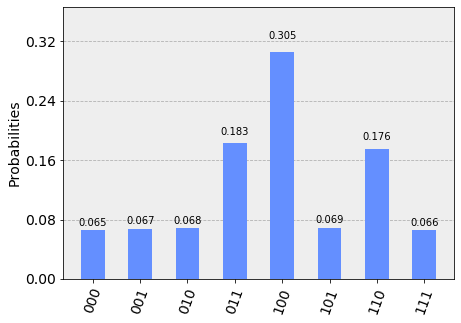

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

#### Interpreting the output
All Pauli matrices have eigenvalue 1 and -1.<br>
The input state |11⟩ is an eigenvector with eigenvalue −1 = exp( 2πi × 0.5).<br> 
Hence,  θ=0.5  and  2<sup>n</sup>θ=2<sup>3</sup>\*0.5 = 4 (100)  if we use  n=3  ancilla qubits.